In [ ]:
# CIFAR-10 데이터 로드
# x_train: 학습용 이미지,  y_train: 학습용 이미지 레이블,  x_test: 테스트용 이미지, y_test:테스트용 이미지 레이블

from tensorflow.keras.datasets import cifar10 # cifar10 데이터 라이브러리

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)  # (50000, 1)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
print(y_train[0])
print(y_train[0][0])
print(labels[y_train[0][0]])

[6]
6
개구리


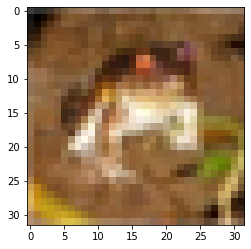

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()

In [ ]:
# 픽셀 값 (0~255) -> (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
num_classes = 10

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPool2D, Dropout, RandomFlip, RandomRotation, Resizing, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50V2

model = Sequential([
                    Input((32, 32, 3)),
                    Resizing(96, 96),
                    RandomFlip("horizontal"),
                    RandomRotation(0.1),                    
                    ResNet50V2(include_top=False, weights="imagenet", input_shape=(96, 96, 3)),
                    GlobalAveragePooling2D(),
                    Dense(128, activation='relu'),
                    Dense(num_classes, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 96, 96, 3)         0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 96, 96, 3)         0         
                                                                 
 random_rotation_1 (RandomRo  (None, 96, 96, 3)        0         
 tation)                                                         
                                                                 
 resnet50v2 (Functional)     (None, 3, 3, 2048)        23564800  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 313s 194ms/step - loss: 1.1044 - accuracy: 0.6177 - val_loss: 1.3546 - val_accuracy: 0.5718
Epoch 2/10
1563/1563 [==============================] - 306s 196ms/step - loss: 0.7789 - accuracy: 0.7319 - val_loss: 1.4023 - val_accuracy: 0.5592
Epoch 3/10
1563/1563 [==============================] - 302s 193ms/step - loss: 0.6689 - accuracy: 0.7714 - val_loss: 0.7524 - val_accuracy: 0.7438
Epoch 4/10
1563/1563 [==============================] - 305s 195ms/step - loss: 0.5931 - accuracy: 0.7972 - val_loss: 0.6036 - val_accuracy: 0.7950
Epoch 5/10
1563/1563 [==============================] - 300s 192ms/step - loss: 0.5376 - accuracy: 0.8155 - val_loss: 1.4209 - val_accuracy: 0.5384
Epoch 6/10
1563/1563 [==============================] - 302s 193ms/step - loss: 0.4923 - accuracy: 0.8312 - val_loss: 1.0607 - val_accuracy: 0.6607
Epoch 7/10
1563/1563 [==============================] - 301s 193ms/step - loss: 0.4510 - accuracy: 0.8455 - val_

In [ ]:
# 테스트 이미지
test_imgs = x_test[:4]

In [ ]:
# 모델 테스트
pred_num = model.predict(test_imgs)

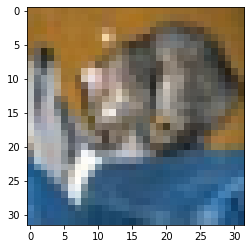

[3.0127438e-05 5.2685130e-07 1.1360889e-03 9.3831444e-01 1.6014697e-05
 6.0425647e-02 1.3994869e-05 4.9971986e-05 1.2000233e-05 1.2456585e-06]
고양이


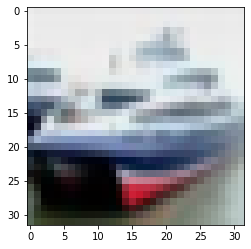

[1.9379854e-03 1.8927021e-03 5.7590091e-06 1.9928909e-06 4.0749139e-08
 5.4468501e-08 3.0074370e-06 1.2712090e-07 9.9602145e-01 1.3685213e-04]
배


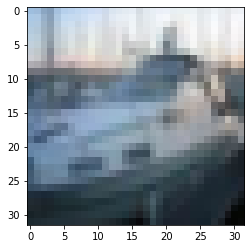

[1.0800203e-01 1.9577979e-03 5.0069073e-05 1.5184592e-04 2.7287895e-05
 1.2955157e-05 6.1478827e-06 1.1115712e-05 8.6549491e-01 2.4285816e-02]
배


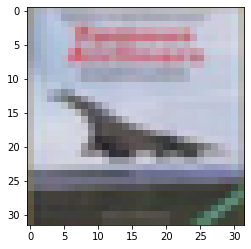

[9.9222988e-01 7.4622651e-05 1.9557597e-03 6.2168110e-04 1.1998489e-05
 3.3503042e-05 5.1237066e-06 3.1617474e-05 4.6604793e-03 3.7539774e-04]
비행기


In [ ]:
# 확인
for i, img in enumerate(test_imgs):
    plt.figure()
    plt.imshow(img)
    plt.show()
    print(pred_num[i])
    class_num = pred_num[i].argmax()
    print(labels[class_num])